## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [114]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

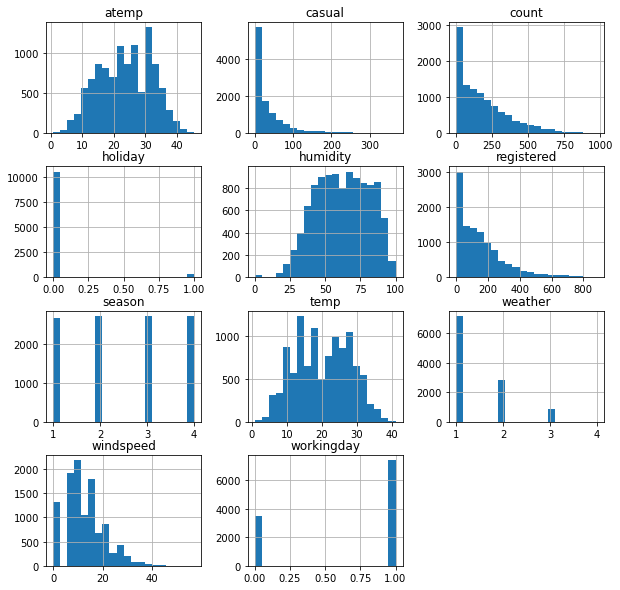

In [115]:
histogram = df.hist(bins = 20, figsize=(10, 10))

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [116]:
for (n, col) in enumerate(df.columns):
    print('Название столбца {}'.format(col))
    print('Среднее', df[col].mean())
    print('Диспресия', (df[col].std())*2)
    print('50%', np.percentile(df[col], 50))
    print('75%', np.percentile(df[col], 75))
    print('99%', np.percentile(df[col], 99))
    print('Мода', df[col].value_counts().nlargest(1))
    level_99 = np.percentile(df[col], 99)
    anomaly = df[(df[col] >= level_99)]
    print('кол-во аномалий', anomaly.shape[0])
    print('_________________________________________')

Название столбца season
Среднее 2.5066139996325556
Диспресия 2.232348618688529
50% 3.0
75% 4.0
99% 4.0
Мода 4    2734
Name: season, dtype: int64
кол-во аномалий 2734
_________________________________________
Название столбца holiday
Среднее 0.02856880396839978
Диспресия 0.3331977012494397
50% 0.0
75% 0.0
99% 1.0
Мода 0    10575
Name: holiday, dtype: int64
кол-во аномалий 311
_________________________________________
Название столбца workingday
Среднее 0.6808745177291935
Диспресия 0.9323183375994842
50% 1.0
75% 1.0
99% 1.0
Мода 1    7412
Name: workingday, dtype: int64
кол-во аномалий 7412
_________________________________________
Название столбца weather
Среднее 1.418427337865148
Диспресия 1.2676771716381843
50% 1.0
75% 2.0
99% 3.0
Мода 1    7192
Name: weather, dtype: int64
кол-во аномалий 860
_________________________________________
Название столбца temp
Среднее 20.230859819952173
Диспресия 15.583179687975012
50% 20.5
75% 26.24
99% 36.08
Мода 14.76    467
Name: temp, dtype: int64
кол-

Вывод: Таким образом, у распределений, наиболее близких к нормальным (temp, atemp, humidity), наблюдается 117, 149 и 148 аномалий соотвественно.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [117]:
for (n, col) in enumerate(df.columns):
    print('Название столбца {}'.format(col))
    print('Эксцесс:', kurtosis(df[col])) # эксцесс
    print('Ассиметрия:', skew(df[col])) # ассиметрия
    print('_________________________')

Название столбца season
Эксцесс: -1.3555899543299803
Ассиметрия: -0.007074695296526289
_________________________
Название столбца holiday
Эксцесс: 30.032624417535125
Ассиметрия: 5.6597371332540805
_________________________
Название столбца workingday
Эксцесс: -1.3977369782030475
Ассиметрия: -0.7760560687198784
_________________________
Название столбца weather
Эксцесс: 0.39480007841067577
Ассиметрия: 1.2433126730817885
_________________________
Название столбца temp
Эксцесс: -0.9146613849825282
Ассиметрия: 0.0036903358354289715
_________________________
Название столбца atemp
Эксцесс: -0.8502363689497141
Ассиметрия: -0.10254538108264065
_________________________
Название столбца humidity
Эксцесс: -0.760019710012902
Ассиметрия: -0.0863232869219358
_________________________
Название столбца windspeed
Эксцесс: 0.629292367034056
Ассиметрия: 0.5886853963635482
_________________________
Название столбца casual
Эксцесс: 7.547610130561701
Ассиметрия: 2.495404491505502
_________________________

Ассисметрия: 
1) распределение скошено влево у метрик: season, workingday, atemp, humidity (у остальных вправо)
2) Незначительная ассиметрия у: season, temp, atemp, humidity, умеренная у: working day, windspeed (у остальных сильная ассиметрия)

Эксцесс:
1) близким к эталонному значению являются эксцесс у: weather, temp, atemp, humidity, windspeed
   аномальные значения эксцесса у holiday.

Вывод: наиболее близкими к нормальному распределению являются метрики temp, atemp, humidity
наибольшее количество аномалий у holiday

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [118]:
def my_norm_confidence(df=df, column = "atemp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [119]:
confidence = my_norm_confidence()
print(confidence)

(7.045172041640964, 40.26499606418288)


Text(0.5, 1.0, 'Доверительный интервал')

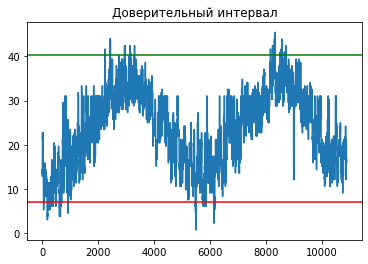

In [120]:
df.atemp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [121]:
for (n, col) in enumerate(df.columns):
    print('Название столбца {}'.format(col))
    upper_level = df[col].mean() + 3*df[col].std()
    anomaly = df[(df[col] >= upper_level)]
    print(anomaly.shape[0])
    print('_________________________')

Название столбца season
0
_________________________
Название столбца holiday
311
_________________________
Название столбца workingday
0
_________________________
Название столбца weather
1
_________________________
Название столбца temp
0
_________________________
Название столбца atemp
0
_________________________
Название столбца humidity
0
_________________________
Название столбца windspeed
67
_________________________
Название столбца casual
292
_________________________
Название столбца registered
235
_________________________
Название столбца count
147
_________________________


Ответ: Если сравнивтаь кол-во аномали только у параметров, распредление кот-ых близко к нормальному (т.е. temp, atemp, humidity, windspeed), то больше всего аномалий получилось в метрике windspeed (у остлаьных 0).

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [122]:
corr_m = df.corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


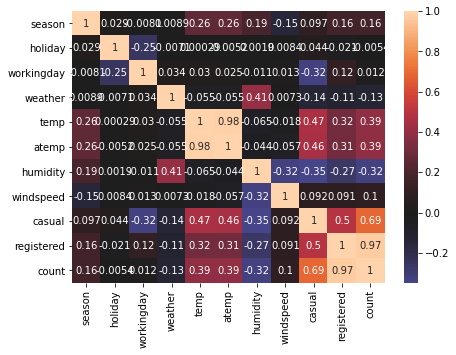

In [123]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Ответ: Самая сильная связь наблюдается между такими показателями, как count и registered. Также, достаточно сильная связь между count и casual.